In [36]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data
from pandas_datareader import data as pdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

yf.pdr_override()

#creating a start date and end date
start = '2010-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'

#company = 'TSLA'
company = 'MSFT'

#creating the dataframe
df= pdr.get_data_yahoo(company, start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  30.620001  31.100000  30.590000  30.950001  23.683073  38409100
2010-01-05  30.850000  31.100000  30.639999  30.959999  23.690723  49749600
2010-01-06  30.879999  31.080000  30.520000  30.770000  23.545328  58182400
2010-01-07  30.629999  30.700001  30.190001  30.450001  23.300470  50559700
2010-01-08  30.280001  30.879999  30.240000  30.660000  23.461157  51197400
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-28  236.889999  239.720001  234.169998  234.529999  234.529999   
2022-12-29  235.649994  241.919998  235.649994  241.009995  241.009995   
2022-12-30  238.210007  239.960007  236.660004  239.820007  239.820007   
2023-01-03  243.080002  245.7

(3274, 6)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
------------------------------checking data information-------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3274 entries, 2010-01-04 to 2023-01-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3274 non-null   float64
 1   High       3274 non-null   float64
 2   Low        3274 non-null   float64
 3   Close      3274 non-null   float64
 4   Adj Close  3274 non-null   float64
 5   Volume     3274 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.0 KB
------------------------------checking data shape-------------
(3274, 6)
------------------------------checking data description-------------
              Open         High          Low        Close    Adj Close  \
count  3274.000000  3274.000000  3274.000000  3274.000000  3274.000000   
mean    100.174765   101.166518    99.131057   100.197349    95.41

<AxesSubplot: xlabel='Date'>

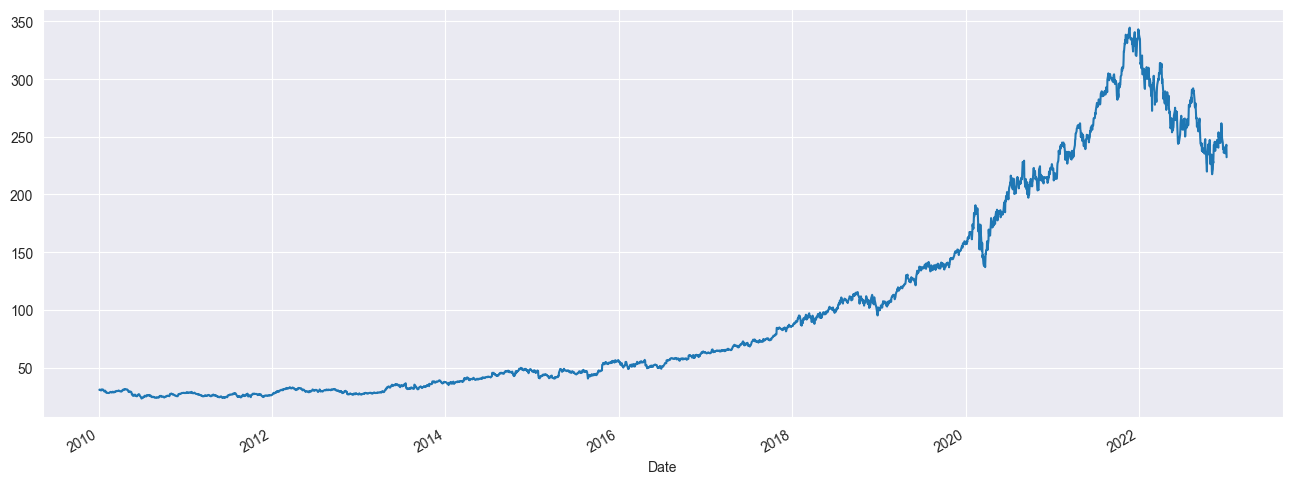

In [37]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
print("------------------------------checking data information-------------")
df.info()
print("------------------------------checking data shape-------------")
print(df.shape)
print("------------------------------checking data description-------------")
print(df.describe())
df['Open'].plot(figsize=(16,6))

In [38]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400


In [39]:
#seperate the data into train and test data

train_headers = ['High','Low', 'Open','Volume']
target_headers = ['Close']

x = df[train_headers]
y = df[target_headers]['Close']

print(x.shape)
print(y.shape)

#we are going to scale down all the values we have so that they fit inbetween 0 and 1
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
x = pd.DataFrame(scaler.fit_transform(x), columns=train_headers)


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state =1)

print(X_train.shape)
print(X_test.shape)

(3274, 4)
(3274,)
(2291, 4)
(983, 4)


Feature importances

The coefficient of the model is  [ 2.73249385e+02  2.62228075e+02 -2.11325391e+02 -8.05575212e-02]
The intercept of the model is  22.989533311316237


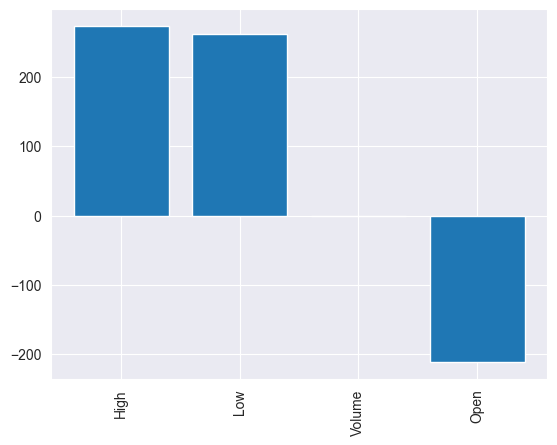

In [40]:
# setting up the Linear regression model
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
rgr.fit(X_train, y_train)

#getting the coefficient and intercept of the model
print('The coefficient of the model is ',rgr.coef_)
print('The intercept of the model is ',rgr.intercept_)

importances = rgr.coef_
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]


# Get the feature names
feature_names = list(X_train.columns)

# Rearrange the feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create a bar plot
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show the plot
plt.show()

In [41]:

#predict the model
y_pred = rgr.predict(X_test)
print(y_pred)
print(y_test)

print(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)

r2_score = rgr.score(X_test, y_test)
print("Test set R^2: {:.2f}".format(r2_score))

[ 28.55635959 107.26123235  47.76249043  40.32013813  28.26992986
  32.78354407  97.76096286 327.19152827 332.50022469  28.80201526
  25.64196503  55.02262577 111.56131154 137.74513081  57.18244389
  74.02317012  25.1388407  174.27719031  24.22187315  50.31731063
  44.79646283  47.46036175  64.64417908 105.54800239  37.40010796
  28.58880563  63.36419543 224.33844648 297.50810074  46.15746537
 216.66196162 184.19422064  30.8570238   50.00946589  56.31876872
 137.58785866  30.26964741  26.03621451  71.72996568  72.90899919
  29.33010576  64.27124797 138.88100785 212.41269872  26.11851271
  33.88871521  74.06464632  26.2574283   97.93741138  94.29232536
  25.54578266  58.17077876  45.08301135 108.5829703   39.63068695
 292.42508185  55.52573044  31.36031413 257.9234557  106.66750628
  29.94216948  25.33133391  54.28694206  53.4071603  178.77744562
 298.81787021 135.09060589  31.72374888  29.19928728 125.16412651
  57.66668043 226.42008907  25.63746803  26.16168284 159.58686267
  41.15255

In [42]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
255      28.820000        28.556360
2160    107.570000       107.261232
1353     47.580002        47.762490
1060     40.160000        40.320138
808      28.110001        28.269930
...            ...              ...
2680    221.149994       221.140234
250      27.850000        27.875235
2064     94.599998        94.695688
2185    108.209999       107.891414
2374    132.100006       132.140998

[983 rows x 2 columns]


In [43]:
dfr.head(10)

,Actual Price,Predicted Price
255,28.820000,28.556360
2160,107.570000,107.261232
1353,47.580002,47.762490
1060,40.160000,40.320138
808,28.110001,28.269930
836,32.720001,32.783544
2110,97.500000,97.760963
3008,328.339996,327.191528
2996,329.679993,332.500225
602,29.110001,28.802015


<AxesSubplot: >

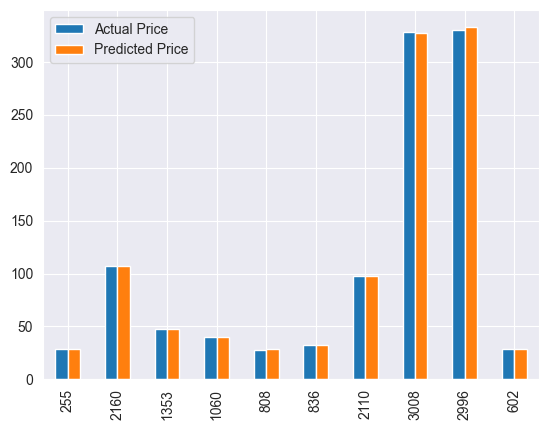

In [44]:
graph=dfr.head(10)
graph.plot(kind='bar')